Data Loading and Exploration

In [63]:
import pandas as pd

# importer le dataset
data = pd.read_csv(r'C:\Users\DELL\Desktop\NetworkTrafficAnomaly\Monday-WorkingHours.pcap_ISCX.csv')

# afficher les 5 premières lignes du dataset
print(data.head())

# informations sur le dataset
print(data.info())

# verifier s'il y a des valeurs manquantes
print(data.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   
2              49188               1                   2   
3              49188               1                   2   
4              49486               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   
2                        0                           12   
3                        0                           12   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   
2                             0                       6   
3                             0                 

In [64]:
# verifier les colonnes du dataset
print(data.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

On elimine la colonne Label puisqu'on travail sur apprentissage non supervise

In [65]:
print(data[' Label'])


0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
529913    BENIGN
529914    BENIGN
529915    BENIGN
529916    BENIGN
529917    BENIGN
Name:  Label, Length: 529918, dtype: object


In [66]:
# Drop the Label column
data = data.drop(columns=[' Label'])
print(data.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   
2              49188               1                   2   
3              49188               1                   2   
4              49486               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   
2                        0                           12   
3                        0                           12   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   
2                             0                       6   
3                             0                 

verifier les valeurs manquantes dans Dataset

In [67]:
# verifier s'il y a des valeurs manquantes
print(data.isnull().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64


verifier les dupliquants 

In [68]:
print(f"Duplicate rows: {data.duplicated().sum()}")



Duplicate rows: 26935


In [69]:
#supprimer les doublons
data = data.drop_duplicates()

features scaling 

In [70]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.fillna(data.mean(), inplace=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

print(data_scaled.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0           1.742576       -0.371509           -0.009639   
1           1.742576       -0.371509           -0.009639   
2           1.756243       -0.371509           -0.009639   
3           1.756243       -0.371509           -0.009639   
4          -0.509167       -0.371488           -0.004180   

    Total Backward Packets  Total Length of Fwd Packets  \
0                -0.010031                    -0.085286   
1                -0.010031                    -0.085286   
2                -0.010031                    -0.085286   
3                -0.010031                    -0.085286   
4                -0.006709                    -0.011444   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                     -0.006865               -0.422115   
1                     -0.006865               -0.422115   
2                     -0.006865               -0.422115   
3                     -0.006865               -0

matrice de correlation

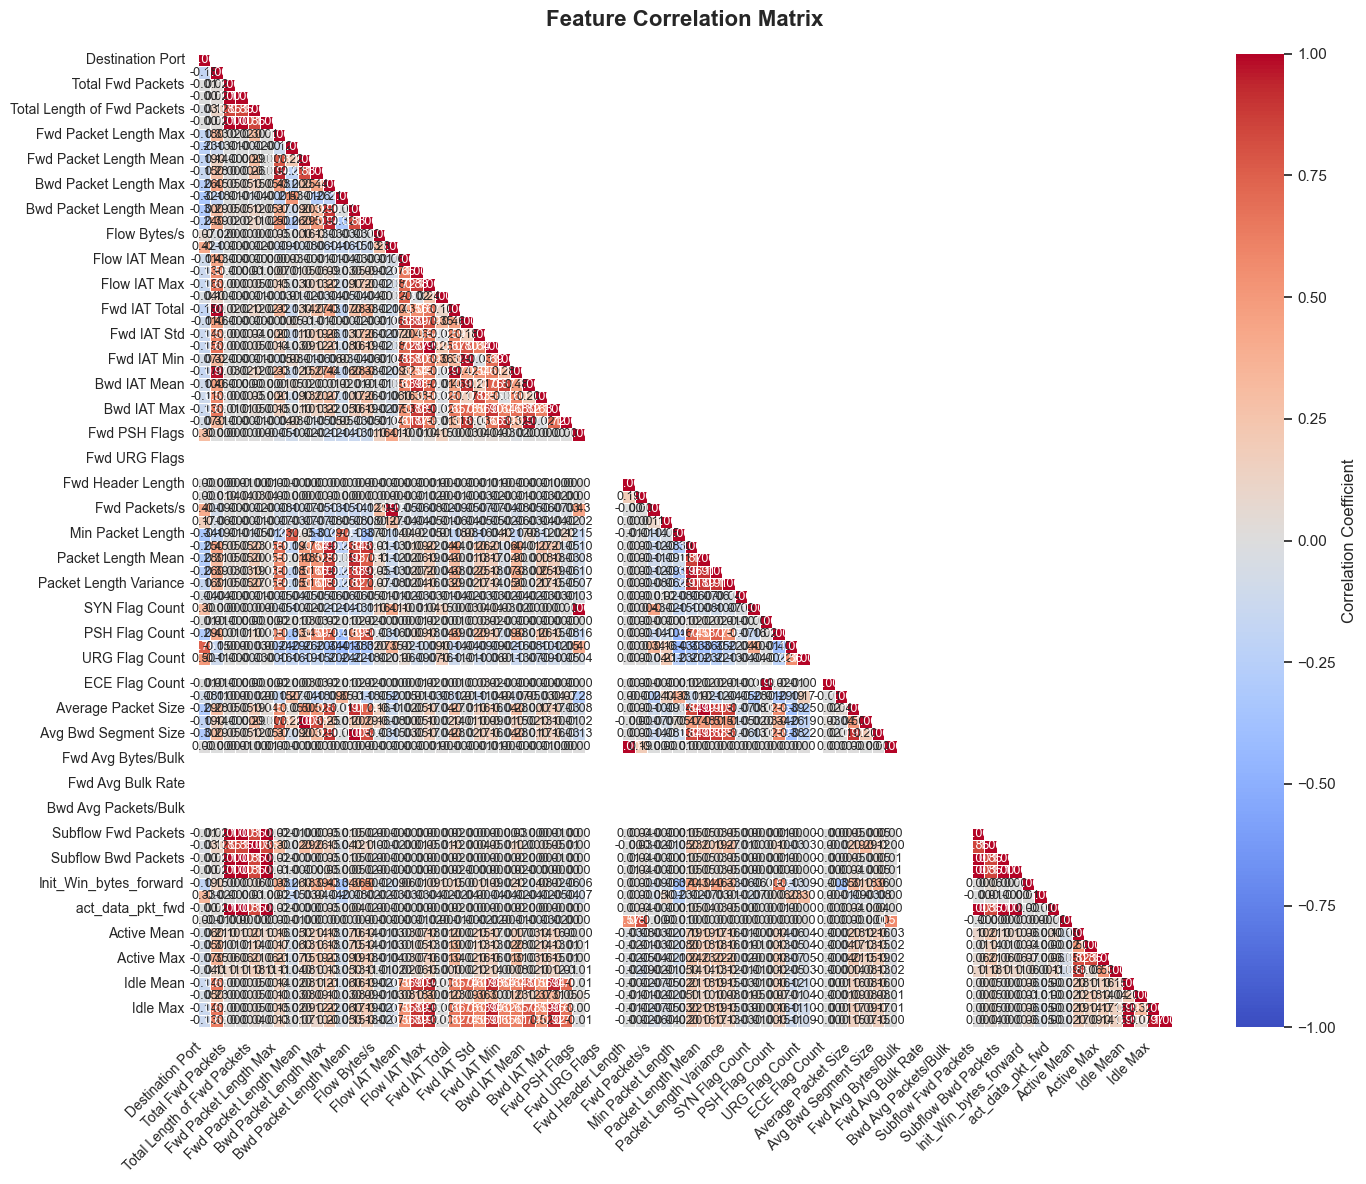

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('default')
sns.set_theme(style="white")


correlation_matrix = data_scaled.corr()


mask = np.triu(np.ones_like(correlation_matrix), k=1)


plt.figure(figsize=(15, 12), dpi=100)


sns.heatmap(correlation_matrix,
            mask=mask, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            vmin=-1, vmax=1,
            center=0,
            square=True,  
            linewidths=0.5, 
            annot_kws={'size': 9},
            cbar_kws={'label': 'Correlation Coefficient'},  
            cbar=True)  


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Feature Correlation Matrix", pad=20, size=16, weight='bold')


plt.tight_layout()

plt.show()




Remove the high correlated freatures

In [72]:

correlation_matrix = data_scaled.corr()


threshold = 0.9


correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]  
            correlated_features.add(colname)


data_reduced = data_scaled.drop(columns=correlated_features)

print(f"Dropped correlated features: {correlated_features}")
print(f"Remaining columns after removing correlated features: {data_reduced.columns}")


Dropped correlated features: {'Bwd IAT Total', ' Bwd Packet Length Std', ' Subflow Bwd Bytes', ' Max Packet Length', ' Packet Length Mean', ' act_data_pkt_fwd', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Idle Min', ' Total Backward Packets', ' Packet Length Std', ' Fwd Header Length.1', 'Fwd Packets/s', ' Fwd Packet Length Std', ' Idle Max', 'Idle Mean', ' Average Packet Size', ' Avg Fwd Segment Size', ' Bwd IAT Mean', ' Fwd IAT Min', 'Fwd IAT Total', ' ECE Flag Count', ' Subflow Bwd Packets', ' Fwd IAT Max', ' Bwd IAT Min', ' SYN Flag Count', ' Avg Bwd Segment Size', ' Bwd IAT Max', ' Total Length of Bwd Packets', ' Packet Length Variance'}
Remaining columns after removing correlated features: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', 'Flow By

In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()




features importance

In [74]:

data_encoded = pd.get_dummies(data_reduced)


reduction de dimension

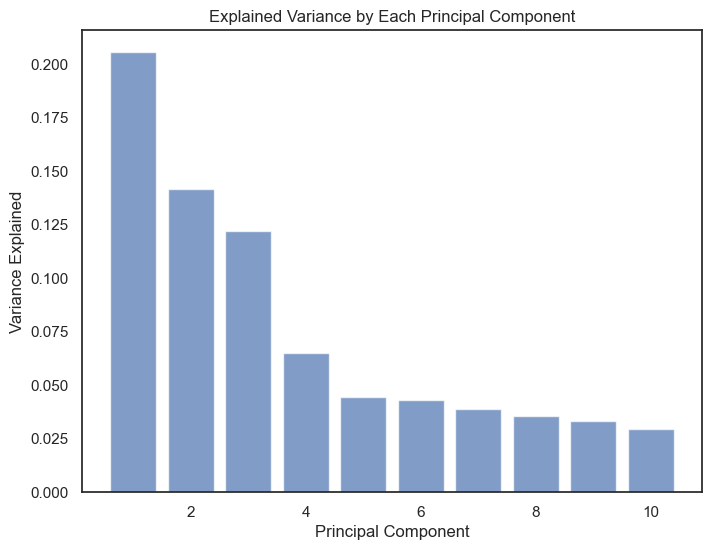

PCA Components: 
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.644796 -0.806244  0.695370 -3.046204 -0.297277 -0.165701  0.238869   
1 -3.286917 -1.054346  0.986728 -6.779924 -2.698004  2.048035  0.646599   
2 -2.717742 -0.834725  0.728550 -3.464771 -0.564345  0.080647  0.284211   
3 -3.288516 -1.055261  0.987535 -6.783632 -2.698325  2.048412  0.646638   
4 -0.570297  0.844541 -0.367678 -0.283893 -0.058446 -0.332635  0.005122   

        PC8       PC9      PC10  
0 -0.150232  0.382150  0.029352  
1 -4.102720 -0.582329  0.117029  
2 -0.589785  0.275877  0.039171  
3 -4.103107 -0.581438  0.117106  
4  1.114488 -0.231590 -0.073948  


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_scaled = scaler.fit_transform(data[numeric_columns])

pca = PCA(n_components=10)
pca_components = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Each Principal Component')
plt.show()

pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(10)])
print(f"PCA Components: \n{pca_df.head()}")


Explained Variance and Cumulative Variance:

In [76]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained Variance per component:", explained_variance)
print("Cumulative Variance:", cumulative_variance)


Explained Variance per component: [0.20546364 0.14171155 0.12212731 0.0652068  0.04429208 0.04306101
 0.03881254 0.03551705 0.03307821 0.02928781]
Cumulative Variance: [0.20546364 0.34717519 0.4693025  0.5345093  0.57880138 0.62186239
 0.66067494 0.69619198 0.72927019 0.758558  ]


Visualize Explained Variance:

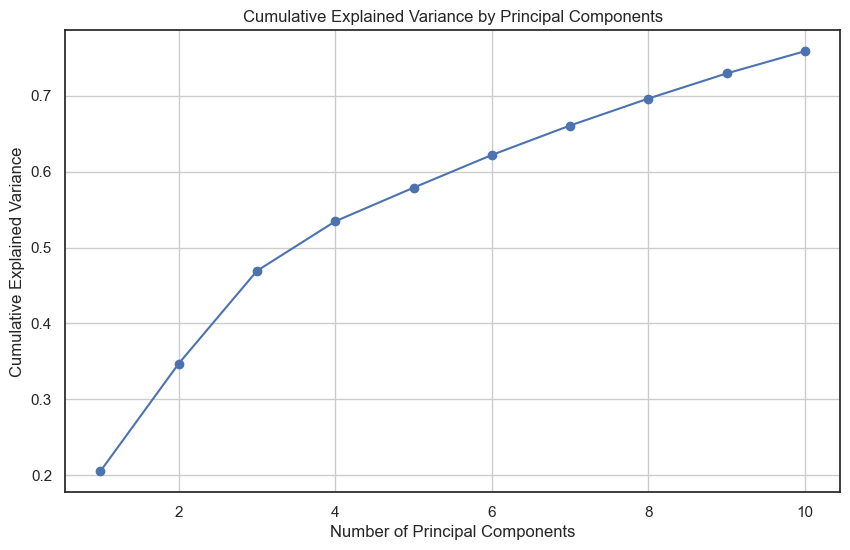

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [78]:
n_components = 10 
X_pca = pca.transform(data_scaled)[:, :n_components]
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.644797 -0.806265  0.695341 -3.045361 -0.295270 -0.163556  0.240565   
1 -3.286920 -1.054355  0.986666 -6.777770 -2.693253  2.049922  0.647882   
2 -2.717743 -0.834745  0.728518 -3.463780 -0.562028  0.082767  0.285867   
3 -3.288518 -1.055270  0.987473 -6.781477 -2.693568  2.050303  0.647926   
4 -0.570297  0.844540 -0.367676 -0.283911 -0.058276 -0.332531  0.005125   

        PC8       PC9      PC10  
0 -0.146328  0.374358  0.011174  
1 -4.093368 -0.598173  0.059041  
2 -0.585268  0.267181  0.016533  
3 -4.093748 -0.597291  0.059082  
4  1.114642 -0.231219 -0.075394  


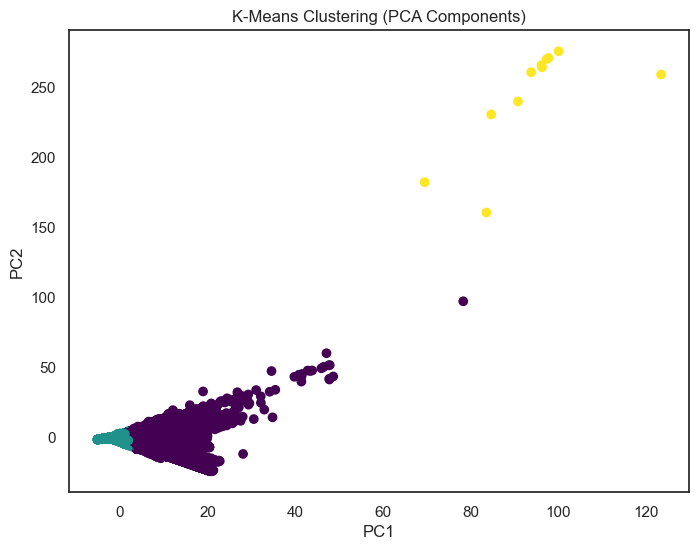

In [79]:
from sklearn.cluster import KMeans
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_df)  

labels = kmeans.labels_
pca_df['Cluster'] = labels

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (PCA Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


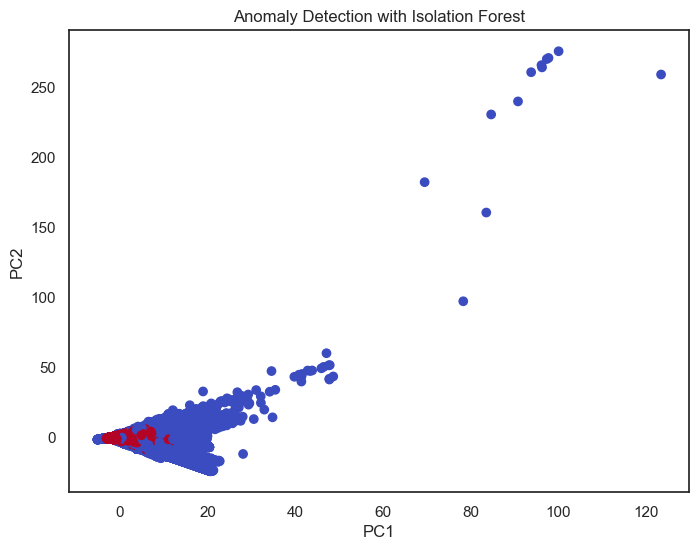

In [80]:
from sklearn.ensemble import IsolationForest


iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(pca_df) 
predictions = iso_forest.predict(pca_df)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=predictions, cmap='coolwarm')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [81]:
anomalies = pca_df[predictions == -1]
print("Anomalies:")
print(anomalies)


Anomalies:
              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1       -3.286920 -1.054355  0.986666 -6.777770 -2.693253  2.049922  0.647882   
3       -3.288518 -1.055270  0.987473 -6.781477 -2.693568  2.050303  0.647926   
6        4.111049  5.416088 -2.587467 -0.151380 -3.030266  1.938730  0.107875   
7        4.564772  5.872248 -2.873352  0.048330 -3.385440  2.119327  0.236742   
9        4.149537  5.454487 -2.605180 -0.152928 -3.061035  1.969311  0.105248   
...           ...       ...       ...       ...       ...       ...       ...   
502690   9.404310  2.421544 -0.542363 -0.354410  3.545066  0.184472 -0.048484   
502795  20.105868 -7.105093  0.144263 -2.753061  3.494946 -1.069793 -2.431564   
502805   0.451939 -0.470260  0.663943 -0.982845  4.017025  1.783548 -1.185065   
502861   3.834622  5.138494 -2.532447  1.537751 -3.730638  3.889734 -0.396358   
502867   4.928392  0.069126 -0.357417 -1.641966  3.944339  1.577569 -2.227604   

             PC8

In [82]:
normal_data = pca_df[predictions == 1]
anomaly_data = pca_df[predictions == -1]


C:\Users\DELL\AppData\Local\Temp\ipykernel_20016\3623130689.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data['Cluster'] = kmeans.labels_


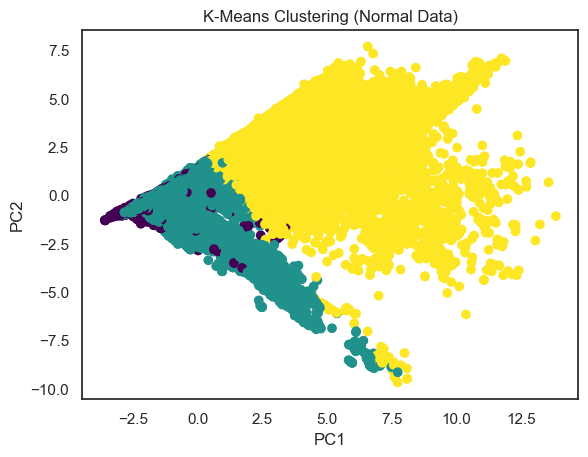

In [83]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normal_data)

normal_data['Cluster'] = kmeans.labels_
plt.scatter(normal_data['PC1'], normal_data['PC2'], c=normal_data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (Normal Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [84]:
iso_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
iso_forest.fit(pca_df)
predictions = iso_forest.predict(pca_df)


In [85]:
anomaly_scores = iso_forest.decision_function(pca_df)
pca_df['anomaly_score'] = anomaly_scores
top_anomalies = pca_df.nlargest(10, 'anomaly_score')
print("Top 10 anomalies based on scores:\n", top_anomalies)


Top 10 anomalies based on scores:
              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
355497 -1.654627 -0.204534  0.226095  1.795813  0.174589  0.392886 -0.206357   
357651 -1.654002 -0.205969  0.220326  1.787068  0.174677  0.390320 -0.206230   
408001 -1.654301 -0.204423  0.225959  1.797121  0.175240  0.392325 -0.206509   
495864 -1.654289 -0.204419  0.225954  1.797169  0.175274  0.392314 -0.206491   
501269 -1.655235 -0.204741  0.226349  1.793371  0.173380  0.393940 -0.206061   
356036 -1.656603 -0.205216  0.226926  1.787853  0.170604  0.396283 -0.205477   
249071 -1.659829 -0.212836  0.223845  1.777159  0.180573  0.386597 -0.209373   
26771  -1.649921 -0.193053  0.221980  1.786183  0.147585  0.413266 -0.196637   
36876  -1.651076 -0.193467  0.222475  1.781466  0.145189  0.415290 -0.196142   
40608  -1.650513 -0.193259  0.222230  1.783781  0.146374  0.414303 -0.196372   

             PC8       PC9      PC10  Cluster  anomaly_score  
355497 -0.331089 -0.2

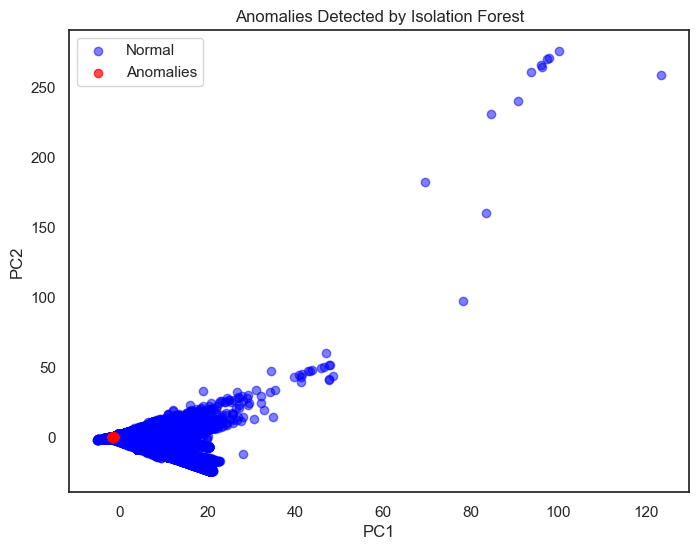

In [86]:
# Visualize anomalies in PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.5, label='Normal')
plt.scatter(pca_df.loc[pca_df['anomaly_score'] > 0.243]['PC1'], 
            pca_df.loc[pca_df['anomaly_score'] > 0.243]['PC2'], 
            c='red', label='Anomalies', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()


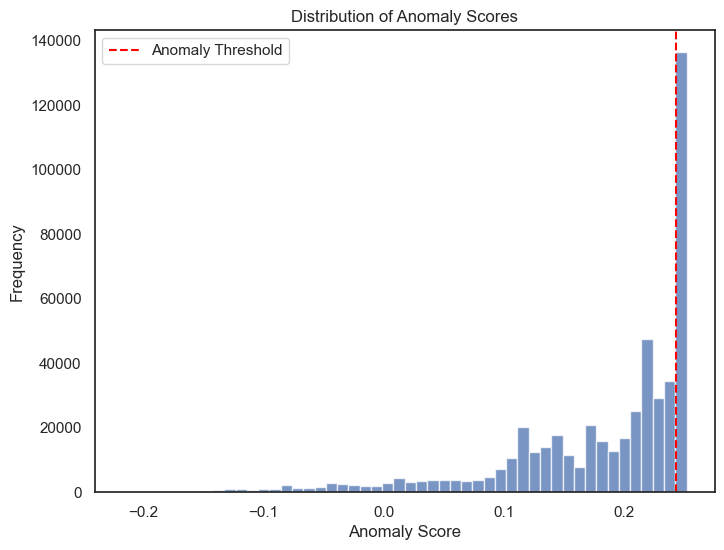

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(pca_df['anomaly_score'], bins=50, alpha=0.75)
plt.axvline(x=0.243324, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [88]:
print(pca_df['anomaly_score'].describe())

new_threshold = pca_df['anomaly_score'].quantile(0.95) 
anomalies_data = pca_df.loc[pca_df['anomaly_score'] > new_threshold]
print(anomalies_data)


count    502983.000000
mean          0.179316
std           0.082120
min          -0.217171
25%           0.138985
50%           0.214009
75%           0.244419
max           0.252513
Name: anomaly_score, dtype: float64
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
406    -1.653295 -0.211273  0.222557  1.812214  0.171662  0.405509 -0.212569   
598    -1.676002 -0.238883  0.238329  1.803504  0.163052  0.442903 -0.229729   
1100   -1.655158 -0.215857  0.227181  1.916717  0.128321  0.511079 -0.237237   
1748   -1.638204 -0.194154  0.220098  1.878909  0.159104  0.431073 -0.213395   
1755   -1.657644 -0.212413  0.228724  1.771437  0.194138  0.363630 -0.205892   
...          ...       ...       ...       ...       ...       ...       ...   
502941 -1.666716 -0.211987  0.233275  1.797783  0.140785  0.449814 -0.213266   
502952 -1.626373 -0.182346  0.212901  1.880842  0.162733  0.411983 -0.204464   
502960 -1.716790 -0.257326  0.256310  1.552657  0.207769  0.

In [89]:
pca_df['anomaly_score'] = iso_forest.decision_function(pca_df.drop(columns=['anomaly_score']))
print(pca_df[['PC1', 'PC2', 'anomaly_score']].head())


        PC1       PC2  anomaly_score
0 -2.644797 -0.806265       0.182767
1 -3.286920 -1.054355       0.041008
2 -2.717743 -0.834745       0.176141
3 -3.288518 -1.055270       0.041008
4 -0.570297  0.844540       0.198373


In [90]:
import joblib
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

['isolation_forest_model.pkl']